In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from plotly.subplots import make_subplots

init_notebook_mode(connected  = True)

import plotly.graph_objs as go

cf.go_offline()
import plotly.express as px



# Data import and overview

Import air quality data for 2018 as df_2018 file

In [3]:
df_2017 = pd.read_csv(r"D:\Data Analyst\Projects\Air quality in Python\data\madrid_2017.csv") 

Overview of the data

In [4]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     210120 non-null  object 
 1   BEN      50201 non-null   float64
 2   CH4      6410 non-null    float64
 3   CO       87001 non-null   float64
 4   EBE      49973 non-null   float64
 5   NMHC     25472 non-null   float64
 6   NO       209065 non-null  float64
 7   NO_2     209065 non-null  float64
 8   NOx      52818 non-null   float64
 9   O_3      121398 non-null  float64
 10  PM10     104141 non-null  float64
 11  PM25     52023 non-null   float64
 12  SO_2     86803 non-null   float64
 13  TCH      25472 non-null   float64
 14  TOL      50117 non-null   float64
 15  station  210120 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 25.6+ MB


In [5]:
df_2017.shape

(210120, 16)

In [6]:
df_2017

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,2017-08-01 00:00:00,NaN,NaN,0.2,NaN,NaN,1.0,27.0,NaN,65.0,NaN,NaN,NaN,NaN,NaN,28079056
210116,2017-08-01 00:00:00,NaN,NaN,0.2,NaN,NaN,1.0,14.0,NaN,NaN,73.0,NaN,7.0,NaN,NaN,28079057
210117,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,83.0,NaN,NaN,NaN,NaN,NaN,28079058
210118,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,11.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,28079059


In [7]:
df_2017.sort_values('date')

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
69620,2017-01-01 01:00:00,NaN,NaN,0.4,NaN,NaN,4.0,32.0,NaN,NaN,16.0,NaN,14.0,NaN,NaN,28079057
69621,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,10.0,30.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058
69623,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,7.0,42.0,NaN,10.0,21.0,NaN,NaN,NaN,NaN,28079060
69619,2017-01-01 01:00:00,NaN,NaN,0.8,NaN,NaN,111.0,46.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,28079056
69618,2017-01-01 01:00:00,1.2,NaN,NaN,0.2,0.21,20.0,41.0,NaN,NaN,NaN,NaN,NaN,1.37,1.8,28079055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158282,2018-01-01 00:00:00,0.2,NaN,NaN,0.1,NaN,1.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,0.1,28079011
158281,2018-01-01 00:00:00,0.5,1.38,0.2,0.1,0.02,2.0,20.0,23.0,69.0,4.0,2.0,3.0,1.39,0.6,28079008
158280,2018-01-01 00:00:00,NaN,NaN,0.3,NaN,NaN,1.0,9.0,11.0,NaN,NaN,NaN,1.0,NaN,NaN,28079004
158291,2018-01-01 00:00:00,NaN,NaN,0.3,NaN,NaN,1.0,6.0,7.0,77.0,NaN,NaN,NaN,NaN,NaN,28079039


# Data cleaning

The air quality data for 2017 has additional few rows for the 1st january 2018 which I don't need. This data should be removed

In [8]:
df_2017 = df_2017[df_2017['date'] != '2018-01-01 00:00:00']

In [9]:
df_2017.sort_values('date')

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
69620,2017-01-01 01:00:00,NaN,NaN,0.4,NaN,NaN,4.0,32.0,NaN,NaN,16.0,NaN,14.0,NaN,NaN,28079057
69621,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,10.0,30.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058
69623,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,7.0,42.0,NaN,10.0,21.0,NaN,NaN,NaN,NaN,28079060
69619,2017-01-01 01:00:00,NaN,NaN,0.8,NaN,NaN,111.0,46.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,28079056
69618,2017-01-01 01:00:00,1.2,NaN,NaN,0.2,0.21,20.0,41.0,NaN,NaN,NaN,NaN,NaN,1.37,1.8,28079055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158258,2017-12-31 23:00:00,0.2,NaN,NaN,0.1,NaN,2.0,13.0,16.0,NaN,NaN,NaN,NaN,NaN,0.2,28079011
158257,2017-12-31 23:00:00,0.6,1.38,0.3,0.1,0.03,6.0,42.0,51.0,47.0,7.0,4.0,3.0,1.41,0.9,28079008
158256,2017-12-31 23:00:00,NaN,NaN,0.3,NaN,NaN,1.0,14.0,16.0,NaN,NaN,NaN,1.0,NaN,NaN,28079004
158267,2017-12-31 23:00:00,NaN,NaN,0.2,NaN,NaN,1.0,8.0,9.0,76.0,NaN,NaN,NaN,NaN,NaN,28079039


I am missing data for the first hour of the 1st of january 2017 which is found in a different file (2016.csv). This data should be imported from the file and joined to the main table

In [10]:
df_2016 = pd.read_csv(r"D:\Data Analyst\Projects\Air quality in Python\data\madrid_2016.csv") 

In [11]:
df_suppl = df_2016[df_2016['date'].str.contains('2017')]

In [12]:
df_suppl

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
139800,2017-01-01 00:00:00,NaN,0.9,NaN,NaN,104.0,51.0,NaN,NaN,NaN,11.0,NaN,NaN,28079004
139801,2017-01-01 00:00:00,1.4,0.2,0.3,0.19,32.0,62.0,5.0,33.0,27.0,13.0,1.90,2.4,28079008
139802,2017-01-01 00:00:00,3.2,NaN,0.8,NaN,9.0,41.0,NaN,NaN,NaN,NaN,NaN,4.7,28079011
139803,2017-01-01 00:00:00,NaN,0.6,NaN,NaN,11.0,43.0,4.0,NaN,NaN,NaN,NaN,NaN,28079016
139804,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,269.0,132.0,1.0,NaN,NaN,18.0,NaN,NaN,28079017
139805,2017-01-01 00:00:00,NaN,0.8,NaN,NaN,94.0,68.0,1.0,57.0,NaN,11.0,NaN,NaN,28079018
139806,2017-01-01 00:00:00,0.7,0.4,0.1,0.11,23.0,37.0,3.0,37.0,33.0,3.0,1.37,1.4,28079024
139807,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,27.0,44.0,2.0,NaN,NaN,NaN,NaN,NaN,28079027
139808,2017-01-01 00:00:00,NaN,1.0,NaN,NaN,128.0,75.0,NaN,NaN,NaN,15.0,NaN,NaN,28079035
139809,2017-01-01 00:00:00,NaN,0.4,NaN,NaN,22.0,49.0,NaN,NaN,NaN,6.0,NaN,NaN,28079036


In [13]:
df_2017_full = pd.concat([df_2017,df_suppl ])

In [14]:
df_2017_full.sort_values('date')

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
139823,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,14.0,55.0,NaN,6.0,23.0,NaN,NaN,NaN,NaN,28079060
139822,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,5.0,32.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,28079059
139800,2017-01-01 00:00:00,NaN,NaN,0.9,NaN,NaN,104.0,51.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,28079004
139801,2017-01-01 00:00:00,1.4,NaN,0.2,0.3,0.19,32.0,62.0,NaN,5.0,33.0,27.0,13.0,1.90,2.4,28079008
139802,2017-01-01 00:00:00,3.2,NaN,NaN,0.8,NaN,9.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,4.7,28079011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158258,2017-12-31 23:00:00,0.2,NaN,NaN,0.1,NaN,2.0,13.0,16.0,NaN,NaN,NaN,NaN,NaN,0.2,28079011
158257,2017-12-31 23:00:00,0.6,1.38,0.3,0.1,0.03,6.0,42.0,51.0,47.0,7.0,4.0,3.0,1.41,0.9,28079008
158256,2017-12-31 23:00:00,NaN,NaN,0.3,NaN,NaN,1.0,14.0,16.0,NaN,NaN,NaN,1.0,NaN,NaN,28079004
158266,2017-12-31 23:00:00,0.3,NaN,NaN,0.2,NaN,1.0,9.0,11.0,NaN,5.0,3.0,3.0,NaN,0.3,28079038


Now the data contains all the information. For future analysis, I need to create separate date columns contaning information on date(without hour), month, day of month, day of week. 

In [15]:
df_2017_full['date'] = pd.to_datetime(df_2017_full['date'])

In [16]:
df_2017_full['Month'] = df_2017_full['date'].apply(lambda x: x.month)

In [17]:
df_2017_full['Day'] = df_2017_full['date'].apply(lambda x: x.day)

In [18]:
df_2017_full['Hour'] = df_2017_full['date'].apply(lambda x: x.hour)

In [19]:
df_2017_full['Day_of_week'] = df_2017_full['date'].apply(lambda x: x.dayofweek)

In [63]:
df_2017_full.sort_values('date')

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station,Month,Day,Hour,Day_of_week
139823,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,14.0,55.0,NaN,6.0,23.0,NaN,NaN,NaN,NaN,28079060,1,1,0,6
139822,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,5.0,32.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,28079059,1,1,0,6
139800,2017-01-01 00:00:00,NaN,NaN,0.9,NaN,NaN,104.0,51.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,28079004,1,1,0,6
139801,2017-01-01 00:00:00,1.4,NaN,0.2,0.3,0.19,32.0,62.0,NaN,5.0,33.0,27.0,13.0,1.90,2.4,28079008,1,1,0,6
139802,2017-01-01 00:00:00,3.2,NaN,NaN,0.8,NaN,9.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,4.7,28079011,1,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158258,2017-12-31 23:00:00,0.2,NaN,NaN,0.1,NaN,2.0,13.0,16.0,NaN,NaN,NaN,NaN,NaN,0.2,28079011,12,31,23,6
158257,2017-12-31 23:00:00,0.6,1.38,0.3,0.1,0.03,6.0,42.0,51.0,47.0,7.0,4.0,3.0,1.41,0.9,28079008,12,31,23,6
158256,2017-12-31 23:00:00,NaN,NaN,0.3,NaN,NaN,1.0,14.0,16.0,NaN,NaN,NaN,1.0,NaN,NaN,28079004,12,31,23,6
158266,2017-12-31 23:00:00,0.3,NaN,NaN,0.2,NaN,1.0,9.0,11.0,NaN,5.0,3.0,3.0,NaN,0.3,28079038,12,31,23,6


Sort the data by date and set the 'date' column as index

In [20]:
df_2017_full = df_2017_full.sort_values('date').set_index(keys = 'date', drop = False)

In [21]:
df_2017_full

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station,Month,Day,Hour,Day_of_week
date,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,14.0,55.0,NaN,6.0,23.0,NaN,NaN,NaN,NaN,28079060,1,1,0,6
2017-01-01 00:00:00,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,5.0,32.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,28079059,1,1,0,6
2017-01-01 00:00:00,2017-01-01 00:00:00,NaN,NaN,0.9,NaN,NaN,104.0,51.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,28079004,1,1,0,6
2017-01-01 00:00:00,2017-01-01 00:00:00,1.4,NaN,0.2,0.3,0.19,32.0,62.0,NaN,5.0,33.0,27.0,13.0,1.90,2.4,28079008,1,1,0,6
2017-01-01 00:00:00,2017-01-01 00:00:00,3.2,NaN,NaN,0.8,NaN,9.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,4.7,28079011,1,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,0.2,NaN,NaN,0.1,NaN,2.0,13.0,16.0,NaN,NaN,NaN,NaN,NaN,0.2,28079011,12,31,23,6
2017-12-31 23:00:00,2017-12-31 23:00:00,0.6,1.38,0.3,0.1,0.03,6.0,42.0,51.0,47.0,7.0,4.0,3.0,1.41,0.9,28079008,12,31,23,6
2017-12-31 23:00:00,2017-12-31 23:00:00,NaN,NaN,0.3,NaN,NaN,1.0,14.0,16.0,NaN,NaN,NaN,1.0,NaN,NaN,28079004,12,31,23,6


Add station geographical location data from the 'stations.csv' file

In [22]:
stations = pd.read_csv(r"D:\Data Analyst\Projects\Air quality in Python\data\stations.csv") 

In [23]:
stations = stations[['id', 'lon', 'lat', 'elevation']]

In [24]:
stations

,id,lon,lat,elevation
0,28079004,-3.712247,40.423853,635
1,28079008,-3.682319,40.421564,670
2,28079011,-3.677356,40.451475,708
3,28079016,-3.639233,40.440047,693
4,28079017,-3.713322,40.347139,604
5,28079018,-3.731853,40.394781,630
6,28079024,-3.747347,40.419356,642
7,28079027,-3.580031,40.476928,621
8,28079035,-3.703172,40.419208,659
9,28079036,-3.645306,40.407947,685


In [25]:
df_2017_full_stations = df_2017_full.merge(stations, how = 'left', left_on = 'station', right_on = 'id')

In [26]:
df_2017_full_stations = df_2017_full_stations.drop(columns = 'id')

In [27]:
df_2017_full_stations

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,...,TCH,TOL,station,Month,Day,Hour,Day_of_week,lon,lat,elevation
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,14.0,55.0,NaN,6.0,...,NaN,NaN,28079060,1,1,0,6,-3.689761,40.500589,715
1,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,5.0,32.0,NaN,8.0,...,NaN,NaN,28079059,1,1,0,6,-3.609072,40.465250,660
2,2017-01-01 00:00:00,NaN,NaN,0.9,NaN,NaN,104.0,51.0,NaN,NaN,...,NaN,NaN,28079004,1,1,0,6,-3.712247,40.423853,635
3,2017-01-01 00:00:00,1.4,NaN,0.2,0.3,0.19,32.0,62.0,NaN,5.0,...,1.90,2.4,28079008,1,1,0,6,-3.682319,40.421564,670
4,2017-01-01 00:00:00,3.2,NaN,NaN,0.8,NaN,9.0,41.0,NaN,NaN,...,NaN,4.7,28079011,1,1,0,6,-3.677356,40.451475,708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,2017-12-31 23:00:00,0.2,NaN,NaN,0.1,NaN,2.0,13.0,16.0,NaN,...,NaN,0.2,28079011,12,31,23,6,-3.677356,40.451475,708
210116,2017-12-31 23:00:00,0.6,1.38,0.3,0.1,0.03,6.0,42.0,51.0,47.0,...,1.41,0.9,28079008,12,31,23,6,-3.682319,40.421564,670
210117,2017-12-31 23:00:00,NaN,NaN,0.3,NaN,NaN,1.0,14.0,16.0,NaN,...,NaN,NaN,28079004,12,31,23,6,-3.712247,40.423853,635
210118,2017-12-31 23:00:00,0.3,NaN,NaN,0.2,NaN,1.0,9.0,11.0,NaN,...,NaN,0.3,28079038,12,31,23,6,-3.707128,40.445544,698


# Data analysis and visualization

#### Particle emissions per month in Madrid 2017

In [28]:
df_2017_full_stations.columns

Index(['date', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3',
       'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station', 'Month', 'Day', 'Hour',
       'Day_of_week', 'lon', 'lat', 'elevation'],
      dtype='object')

In [29]:
df_mean = df_2017_full_stations.groupby('Month').mean()
df_mean

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,...,SO_2,TCH,TOL,station,Day,Hour,Day_of_week,lon,lat,elevation
Month,,,,,,,,,,,,,,,,,,,,,
1,2017-01-16 11:30:00.000000000,1.140532,NaN,0.526101,0.454343,0.180171,45.906905,53.180291,NaN,25.870191,...,10.371194,1.558630,3.429264,2.807904e+07,16.000000,11.5,2.935484,-3.679019,40.434616,658.333333
2,2017-02-14 23:30:00.000000000,0.650801,NaN,0.403402,0.349145,0.149418,24.218799,42.518207,NaN,37.022210,...,8.782135,1.438787,2.118017,2.807904e+07,14.500000,11.5,3.000000,-3.679019,40.434616,658.333333
3,2017-03-16 11:30:00.000000000,0.566928,NaN,0.370568,0.366793,0.148114,21.276097,40.956074,NaN,48.512595,...,8.207455,1.446659,2.218410,2.807904e+07,16.000000,11.5,3.000000,-3.679019,40.434616,658.333333
4,2017-04-15 23:30:00.000000000,0.385269,NaN,0.334475,0.254622,0.138118,8.857068,30.653029,NaN,68.799000,...,5.381511,1.371062,1.517984,2.807904e+07,15.500000,11.5,3.166667,-3.679019,40.434616,658.333333
5,2017-05-16 11:30:00.000000000,0.357268,NaN,0.292070,0.244542,0.139685,7.927778,30.404014,NaN,66.820696,...,5.108316,1.210667,1.581583,2.807904e+07,16.000000,11.5,2.806452,-3.679019,40.434616,658.333333
6,2017-06-15 23:38:47.196652800,0.320005,NaN,0.268285,0.308662,0.117048,7.449532,31.438700,NaN,72.320340,...,5.539689,1.306662,1.591707,2.807904e+07,15.506102,11.5,3.028126,-3.678733,40.434680,658.401674
7,2017-07-16 11:08:36.016150784,0.334303,NaN,0.246638,0.274312,0.095352,8.236789,32.925305,NaN,64.593196,...,5.323442,1.369712,1.707014,2.807904e+07,15.985139,11.5,3.064547,-3.679004,40.434609,658.309556
8,2017-08-16 11:18:17.442799616,0.292433,NaN,0.241843,0.264197,0.118447,6.062225,27.962744,NaN,65.731266,...,6.221533,1.374932,1.594495,2.807904e+07,15.991869,11.5,2.905731,-3.679113,40.434575,658.331090
9,2017-09-15 23:30:00.000000000,0.493859,NaN,0.325573,0.393196,0.122016,15.008747,39.925243,NaN,51.713658,...,6.920447,1.389051,2.612459,2.807904e+07,15.500000,11.5,3.100000,-3.679019,40.434616,658.333333


In [30]:
df_mean = df_mean[['BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3',
       'PM10', 'PM25', 'SO_2', 'TCH', 'TOL']]
fig = df_mean.iplot(asFigure = True, title = 'Air particle emissions per month in 2017 in Madrid',showgrid=False)
fig.update_layout (
    xaxis_title="Month", yaxis_title="Emission in μg/m³",
    title_font_color = 'black', title_font_size = 30, 
    xaxis_title_font_color = 'black', xaxis_title_font_size = 25,
    yaxis_title_font_color = 'black', yaxis_title_font_size = 25,
    plot_bgcolor='white'
    )
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    tick0 = 1,
    dtick = 1
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)



In [31]:
fig.write_html(r"D:\Data Analyst\Projects\Air quality in Python\fig1.html")

### Nitric acid (NO) emission map of Madrid

In [32]:
df2 = df_2017_full_stations.groupby('station').mean()[['NO', 'lon', 'lat', 'elevation']]

In [33]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as cx

In [34]:
street_map = gpd.read_file(r"C:\Users\katja\Downloads\Límites del municipio de Madrid\Madrid_ETRS89.shp")

<Axes: >

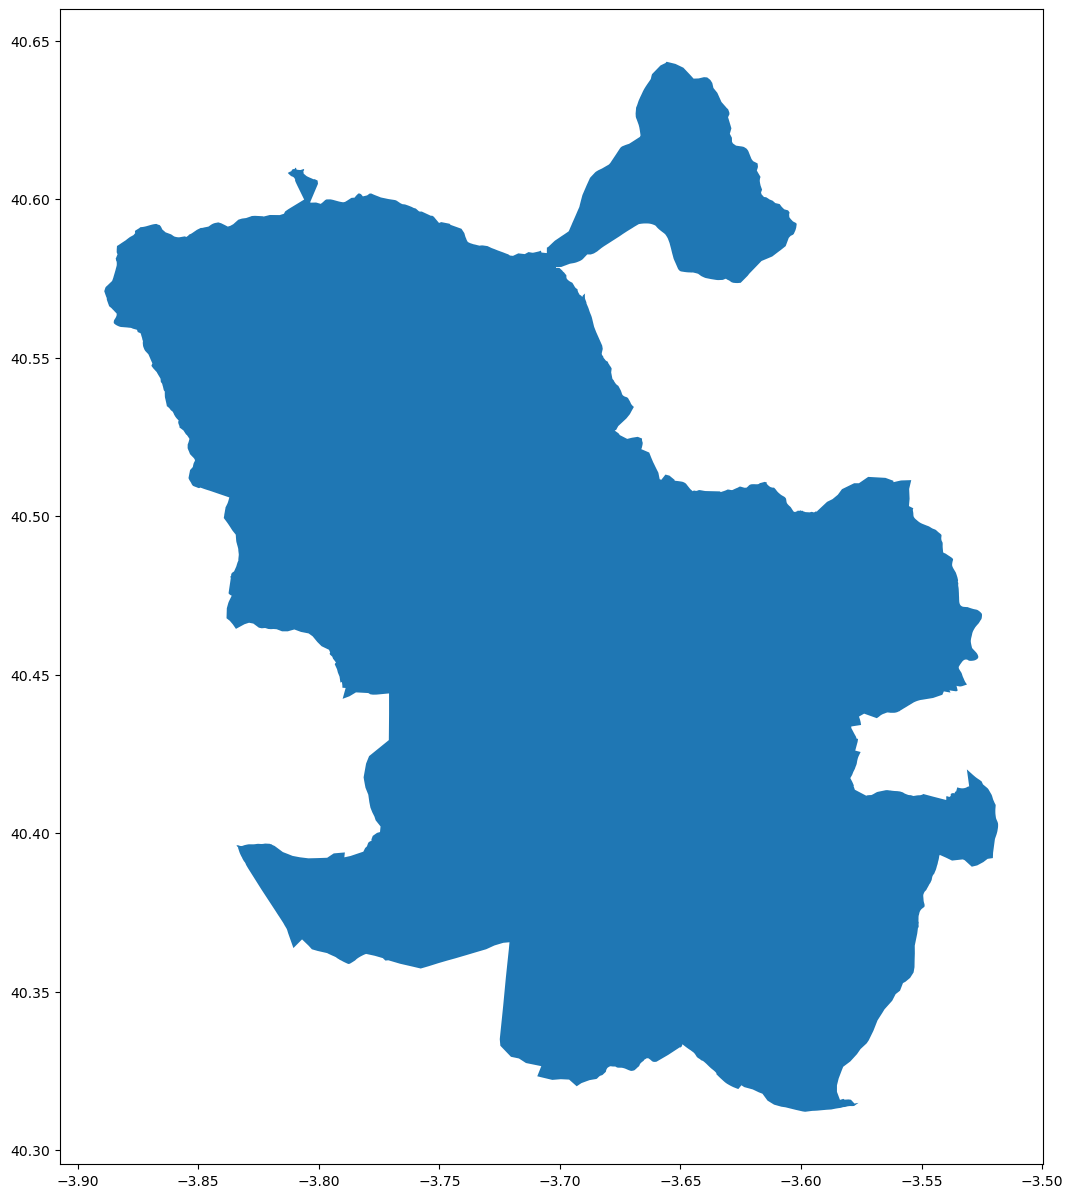

In [35]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [36]:
geometry = [Point(xy) for xy in zip(df2['lon'], df2['lat'])]

In [37]:
crs = {'init':'epsg:4326'}

In [38]:
geo_df = gpd.GeoDataFrame(df2, #specify our data
                          crs = crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head(20)

C:\Users\katja\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,NO,lon,lat,elevation,geometry
station,,,,,
28079004,38.977765,-3.712247,40.423853,635.0,POINT (-3.71225 40.42385)
28079008,33.657323,-3.682319,40.421564,670.0,POINT (-3.68232 40.42156)
28079011,25.244386,-3.677356,40.451475,708.0,POINT (-3.67736 40.45148)
28079016,19.283671,-3.639233,40.440047,693.0,POINT (-3.63923 40.44005)
28079017,39.373277,-3.713322,40.347139,604.0,POINT (-3.71332 40.34714)
28079018,22.027956,-3.731853,40.394781,630.0,POINT (-3.73185 40.39478)
28079024,9.870631,-3.747347,40.419356,642.0,POINT (-3.74735 40.41936)
28079027,19.532090,-3.580031,40.476928,621.0,POINT (-3.58003 40.47693)
28079035,26.863189,-3.703172,40.419208,659.0,POINT (-3.70317 40.41921)


Text(0.5, 1.0, 'Nitric oxide gas emission map of Madrid')

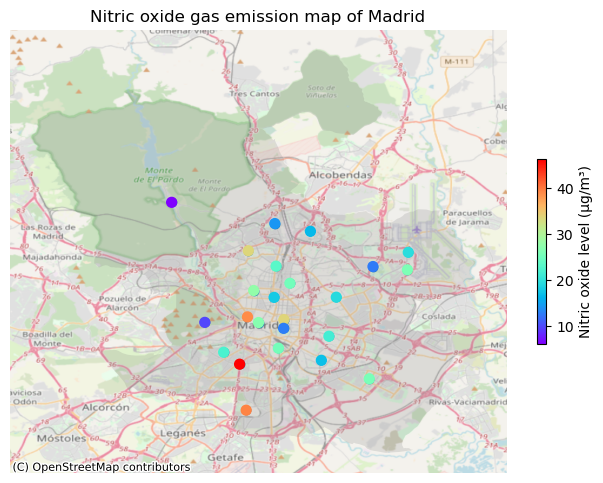

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
street_map.plot(ax=ax, alpha=0.2, color='grey')
geo_df.plot(ax=ax)
geo_df.plot(column = 'NO', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3, 'label': "Nitric oxide level (μg/m³)"}, 
            markersize = 50)
cx.add_basemap(ax, crs=street_map.crs, source=cx.providers.OpenStreetMap.Mapnik, alpha = 0.8)
ax.set_axis_off()

ax.set_title('Nitric oxide gas emission map of Madrid')


In [41]:
fig.savefig(r"D:\Data Analyst\Projects\Air quality in Python\fig2.jpg", dpi = 300)

### Correlation between the altitude and the nitric oxide emissions

In [91]:
df3 = df_2017_full_stations.groupby('elevation').mean().reset_index()

In [92]:
df3

,elevation,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,...,SO_2,TCH,TOL,station,Month,Day,Hour,Day_of_week,lon,lat
0,599,2017-07-02 11:30:00.000000000,NaN,NaN,NaN,NaN,NaN,25.434982,43.405105,142.158802,...,NaN,NaN,NaN,28079047.0,6.526027,15.720548,11.5,3.008219,-3.686825,40.398114
1,604,2017-07-02 11:30:00.000000000,NaN,NaN,0.378547,NaN,NaN,42.885345,53.892701,207.577203,...,5.719936,NaN,NaN,28079036.5,6.526027,15.720548,11.5,3.008219,-3.716025,40.366051
2,615,2017-07-02 11:30:00.000000000,NaN,NaN,NaN,NaN,NaN,6.098809,18.217655,42.744439,...,NaN,NaN,NaN,28079058.0,6.526027,15.720548,11.5,3.008219,-3.774611,40.518058
3,618,2017-07-02 11:30:00.000000000,0.548406,1.315898,NaN,0.379609,0.152016,26.028802,46.958180,135.443736,...,NaN,1.359940,2.425584,28079055.0,6.526027,15.720548,11.5,3.008219,-3.580747,40.462531
4,621,2017-07-02 11:30:00.000000000,NaN,NaN,NaN,NaN,NaN,19.532090,40.056401,112.149478,...,NaN,NaN,NaN,28079027.0,6.526027,15.720548,11.5,3.008219,-3.580031,40.476928
5,627,2017-07-02 11:30:00.000000000,NaN,NaN,NaN,NaN,NaN,25.743417,39.757385,132.373012,...,NaN,NaN,NaN,28079054.0,6.526027,15.720548,11.5,3.008219,-3.612117,40.372933
6,630,2017-07-02 11:30:00.000000000,0.480442,NaN,0.417398,0.304509,NaN,22.027956,41.925642,128.517979,...,5.513473,NaN,2.792448,28079018.0,6.526027,15.720548,11.5,3.008219,-3.731853,40.394781
7,635,2017-07-02 11:30:00.000000000,NaN,NaN,0.446630,NaN,NaN,38.977765,49.432894,170.261699,...,5.244790,NaN,NaN,28079004.0,6.526027,15.720548,11.5,3.008219,-3.712247,40.423853
8,642,2017-07-02 15:04:18.563535872,0.335098,1.219176,0.245511,0.174669,0.095879,9.870631,25.001045,72.062956,...,3.353284,1.238621,1.612269,28079024.0,6.530387,15.734461,11.5,2.997698,-3.747347,40.419356
9,659,2017-07-02 11:30:00.000000000,NaN,NaN,0.344389,NaN,NaN,26.863189,49.082475,134.772686,...,8.356201,NaN,NaN,28079035.0,6.526027,15.720548,11.5,3.008219,-3.703172,40.419208


In [93]:
df3.columns

Index(['elevation', 'date', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2',
       'NOx', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station', 'Month',
       'Day', 'Hour', 'Day_of_week', 'lon', 'lat'],
      dtype='object')

In [98]:
df3_full = df3[['elevation', 'NO', 'NO_2', 'NOx']]

In [95]:
df3_full

,elevation,NO,NO_2,NOx
0,599,25.434982,43.405105,142.158802
1,604,42.885345,53.892701,207.577203
2,615,6.098809,18.217655,42.744439
3,618,26.028802,46.958180,135.443736
4,621,19.532090,40.056401,112.149478
5,627,25.743417,39.757385,132.373012
6,630,22.027956,41.925642,128.517979
7,635,38.977765,49.432894,170.261699
8,642,9.870631,25.001045,72.062956
9,659,26.863189,49.082475,134.772686


C:\Users\katja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



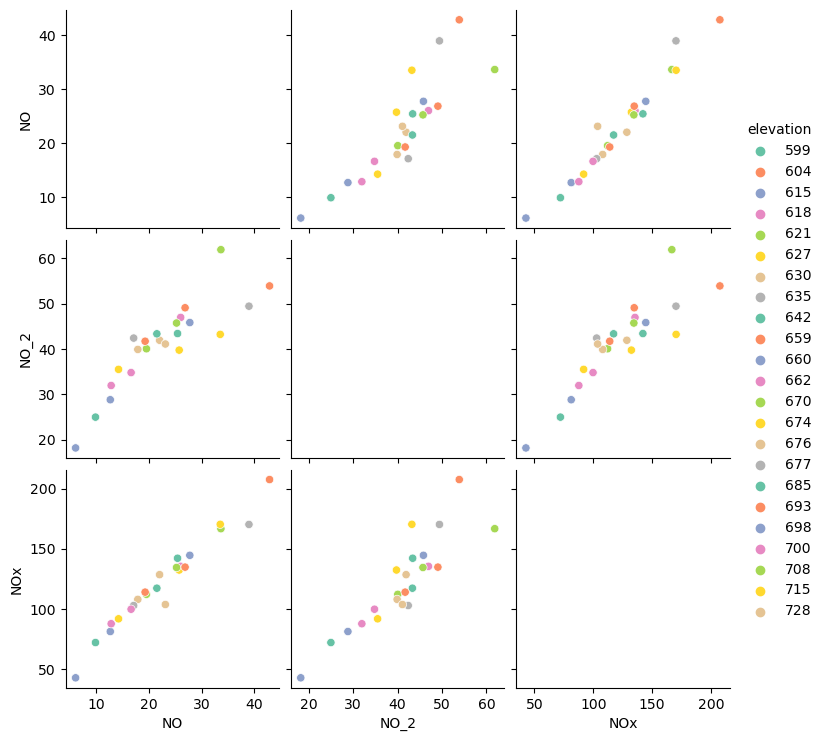

In [99]:
sns.pairplot(df3_full, hue="elevation",palette="Set2", diag_kind="kde", height=2.5)

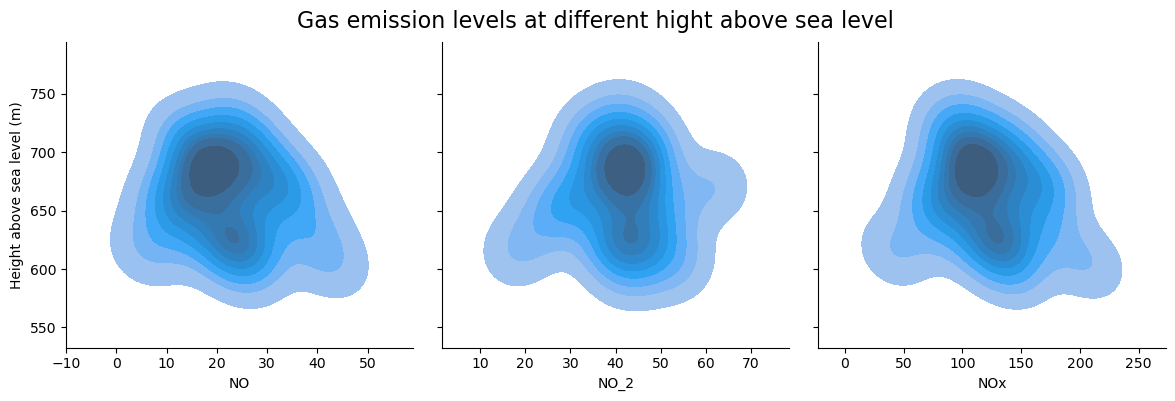

In [120]:
g = sns.PairGrid(df3_full, y_vars=["elevation"], x_vars=['NO', 'NO_2', 'NOx'], height=4)
g.map(sns.kdeplot, fill=True )
g.set(ylabel='Height above sea level (m)')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Gas emission levels at different hight above sea level', fontsize=16)
g.savefig(r"D:\Data Analyst\Projects\Air quality in Python\fig4.jpg", dpi = 300)